# Diabetes Protection Using Demographic Data And Body Measurement
## About the Data:
* The data is taken from the **_[National Health and Nutrition Examination Survey (NHANES)](https://www.cdc.gov/Nchs/Nhanes/about_nhanes.htm)_**. 
* The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. NHANES is a major program of the National Center for Health Statistics (NCHS). NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation.<br>
* The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as
well as laboratory tests administered by highly trained medical personnel.<br> 
* To date, [thousands of research findings have been published using the NHANES data.](https://www.ncbi.nlm.nih.gov/pubmed?orig_db=PubMed&term=NHANES&cmd=search)<br>
<br>
* **The 2013-2014 NHANES Datasets include the following components:**
    * **[Demographic Dataset:](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Demographics&CycleBeginYear=2013)**
        1. **SEQN** - Respondent sequence number
        2. **RIAGENDR** - Gender of the participant
        3. **DMDYRSUS** - Length of time the participant has been in the US
        4. **INDFMPIR** - A ratio of family income to poverty guidelines
    * **[Diet Dataset:](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Dietary&CycleBeginYear=2013)**
        1. **DRABF** - Indicates whether the sample person was an infant who was breast-fed on either of the two recall days
    * **[Examination Dataset:](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Examination&CycleBeginYear=2013)**
        1. **BMXARMC** - Arm Circumference (cm)
        2. **BMDAVSAD** - Average Sagittal Abdominal Diameter (cm)
        3. **MGDCGSZ** - Combined grip strength (kg): the sum of the largest reading from each hand
    * **[Laboratory Dataset:](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Laboratory&CycleBeginYear=2013)**
        1. **LBXGH** - Glycohemoglobin (%)
    * **[Questionnaire Dataset](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Questionnaire&CycleBeginYear=2013)**
<br>
* **Steps:**
    1. Loading and Preparing the Data
    2. Creating the Model
        - Simple Linear Regression Model
        - Adaboost with Decision Tree Classifiers
        - Bagging Decision Tree Classifiers
        - Bagging Decision Tree KNeighbor Classifier
        - XGBoost
        - Neural Network
    3. Summarizing the Performance of the Models


## 1. Loading & Preparing the Data

In [25]:
# Importing all the modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot

import re
import sklearn

# Ignorign the warnings for cleaner output 
import warnings
warnings.filterwarnings("ignore")

In [26]:
# Importing all the required data
df1 = pd.read_csv('labs.csv')
df2 = pd.read_csv('examination.csv')
df3 = pd.read_csv('demographic.csv')
df4 = pd.read_csv('diet.csv')
df5 = pd.read_csv('questionnaire.csv')

In [27]:
print('df1 = ', df1['SEQN'].count())
print('df2 = ', df2['SEQN'].count())
print('df3 = ', df3['SEQN'].count())
print('df4 = ', df4['SEQN'].count())
print('df5 = ', df5['SEQN'].count())

df1 =  9813
df2 =  9813
df3 =  10175
df4 =  9813
df5 =  10175


In [28]:
# Merging all the data on 'SEQN' i.e. Respondent sequence number
df = pd.merge(df1, df2, on='SEQN', how='inner')
df = pd.merge(df, df3, on='SEQN', how='inner')
df = pd.merge(df, df4, on='SEQN', how='inner')
df = pd.merge(df, df5, on='SEQN', how='inner')

In [29]:
df.count()

SEQN        9813
URXUMA      8052
URXUMS      8052
URXUCR.x    8052
URXCRS      8052
            ... 
WHD140      5914
WHQ150      5836
WHQ030M     1478
WHQ500      1478
WHQ520      1478
Length: 1812, dtype: int64

In [30]:
df.describe()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,...,14.0,28.0,4064.000000,4870.000000,2688.000000,5914.000000,5836.000000,1478.000000,1478.000000,1478.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,...,35.0,40.0,400.188238,553.871663,367.752976,311.741123,553.798492,2.583221,2.299729,1.746955
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,...,0.0,0.0,1471.400188,1943.995173,1700.211868,1060.053377,7148.984994,0.784612,1.213281,0.709430
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,...,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,...,35.0,40.0,140.000000,125.000000,63.000000,155.000000,25.000000,3.000000,1.000000,1.000000
50%,78643.000000,8.400000,8.400000,106.000000,9370.400000,7.780000,56397.702304,84.000000,0.840000,4.300000,...,35.0,40.0,165.000000,150.000000,66.000000,185.000000,38.000000,3.000000,2.000000,2.000000
75%,81191.000000,17.625000,17.625000,163.000000,14409.200000,15.295000,99356.561999,101.000000,1.010000,4.500000,...,35.0,40.0,197.000000,180.000000,70.000000,225.000000,53.000000,3.000000,3.000000,2.000000
max,83731.000000,9600.000000,9600.000000,659.000000,58255.600000,9000.000000,395978.465792,234.000000,2.340000,5.600000,...,35.0,40.0,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000


In [31]:
# Preparing the Data
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

# Renaming all the relevant columns names
df = df.rename(columns = {'SEQN'     : 'ID',
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US',
                          'INDFMPIR' : 'Family_income',
                          'LBXGH'    : 'GlycoHemoglobin',
                          'BMXARMC'  : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ'  : 'GripStrength',
                          'DRABF'    : 'Breast_fed'})

# Removing the NaN in years in US
df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x>0 else 0) 

# Family Income na filled 
df['Family_income'] = df['Family_income'].fillna(method='ffill')

# Breast_fed na filled to 1
df['Breast_fed'] = df['Breast_fed'].fillna(value=1)

# Replacing the na with the column median
df['GlycoHemoglobin'] = df['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['ArmCircum'] = df['ArmCircum'].fillna(df['ArmCircum'].median())
df['GripStrength'] = df['GripStrength'].fillna(df['GripStrength'].median())

# Keeping only the relevant columns
df = df.loc[:, ['ID', 'Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum', 'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]

df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,1.507694,1.669826,2.246474,5.564201,28.528248,21.004545,62.455233,1.868949
std,2938.592266,0.499966,8.412254,1.630113,0.834491,7.753571,4.261142,22.228196,0.337473
min,73557.000000,1.000000,0.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,0.000000,0.870000,5.300000,23.200000,18.500000,50.300000,2.000000
50%,78643.000000,2.000000,0.000000,1.710000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,0.000000,3.580000,5.600000,33.800000,22.900000,73.300000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


## Using Glycohemoglobin to Classify Diabetes 
- 0 - Normal Status
- 1 - High-Risk Diabetes 
- 2 - Diabetes Patients

In [32]:
from sklearn.feature_selection import VarianceThreshold

# Removing all features with low variance 
# Features with a training-set variance lower than this threshold will be removed 
sel = VarianceThreshold(threshold=(0.15))
sel.fit_transform(df) 

df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,1.507694,1.669826,2.246474,5.564201,28.528248,21.004545,62.455233,1.868949
std,2938.592266,0.499966,8.412254,1.630113,0.834491,7.753571,4.261142,22.228196,0.337473
min,73557.000000,1.000000,0.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,0.000000,0.870000,5.300000,23.200000,18.500000,50.300000,2.000000
50%,78643.000000,2.000000,0.000000,1.710000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,0.000000,3.580000,5.600000,33.800000,22.900000,73.300000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


In [33]:
# Classifying the data using the GlycoHemoglobin data
df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2

df.head()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,0.0,0.84,13.9,35.3,20.6,55.2,2.0,2.0
1,73558,1,0.0,1.78,9.1,34.7,24.4,61.5,2.0,2.0
2,73559,1,0.0,4.51,8.9,33.5,25.6,91.0,2.0,2.0
3,73560,1,0.0,2.52,5.4,21.0,14.9,32.2,2.0,0.0
4,73561,2,0.0,5.00,4.9,25.2,20.7,30.9,2.0,0.0


Text(0.5, 1.0, 'Correlation Map')

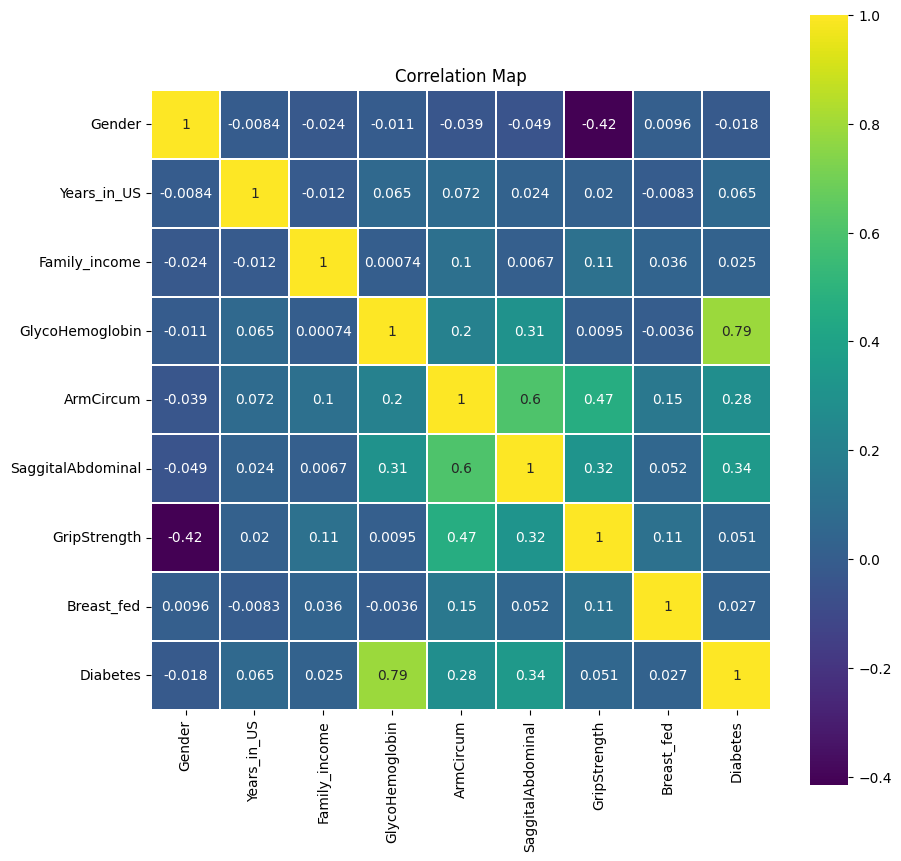

In [34]:
# Correlation Map for the Data
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True).set_title("Correlation Map")

# We can see there is a strong correlation between GlycoHemoglobin and Diabetes.

## 2. Creating the model

In [35]:
# Importing required models
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
df.drop(['GlycoHemoglobin'], axis = 1, inplace=True)
df.head()

,ID,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,0.0,0.84,35.3,20.6,55.2,2.0,2.0
1,73558,1,0.0,1.78,34.7,24.4,61.5,2.0,2.0
2,73559,1,0.0,4.51,33.5,25.6,91.0,2.0,2.0
3,73560,1,0.0,2.52,21.0,14.9,32.2,2.0,0.0
4,73561,2,0.0,5.00,25.2,20.7,30.9,2.0,0.0


### 2A. Simple Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression

# Divifing the data into attributes & target
data = df.drop(['Diabetes'], axis= 1)
target = df['Diabetes']

# Seperating the tarining set & test set
train_X = data[:6000]
test_X = data[6000:]
train_Y = target[:6000]
test_Y = target[6000:]

# Creating linear regression obj
lr_regr = LinearRegression()

# Training via Linear Regression model
lr_regr.fit(train_X, train_Y)

# Making predictions using the test sets
lr_pred_diabetes = lr_regr.predict(test_X)
lr_score = lr_regr.score(test_X, test_Y)

print('LR_Coefficient: ', lr_regr.coef_)
print('LR_Mean Square Error: %.2f' % mean_squared_error(test_Y, lr_pred_diabetes))
print('LR_Variance score: %.2f' % r2_score(test_Y, lr_pred_diabetes))
print('Score: %.2f' % lr_regr.score(test_X, test_Y))

LR_Coefficient:  [ 1.93236231e-06 -6.23754281e-02  3.95588052e-03  8.69866162e-03
  1.13385470e-02  3.62508018e-02 -3.78685606e-03  6.44189354e-03]
LR_Mean Square Error: 0.23
LR_Variance score: 0.12
Score: 0.12


In [38]:
lr_pred_diabetes

array([0.19701809, 0.07479519, 0.15985951, ..., 0.47596222, 0.24856305,
       0.1838351 ])

## Treating it as a Classification Problem
### 2B. Adaboost with Decision Tree Classifiers

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Creating an AdaBoost Classification obj
ad_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=0.5, random_state=100)

# Training via Adaboost classification model
ad_clf.fit(train_X, train_Y)

# Making predictions using the test set
ad_pred_diabetes = ad_clf.predict(test_X)
print('Predictions: \n', ad_pred_diabetes)

print('\nParameters: \n', ad_clf.get_params)

# Score
ad_clf_score = ad_clf.score(test_X, test_Y)
print("\nMean Accuracy: %.2f" % ad_clf.score(test_X, test_Y))

Predictions: 
 [0. 0. 0. ... 2. 0. 0.]

Parameters: 
 <bound method BaseEstimator.get_params of AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.5,
                   n_estimators=100, random_state=100)>

Mean Accuracy: 0.79


## Improving the Performance

### 2C. Bagging Decision Tree Classifiers

In [40]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(estimator= DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, bootstrap=False, bootstrap_features=False)
bagging.fit(train_X,train_Y)
bg_pred_diabetes = bagging.predict(test_X)
bg_dt_score = bagging.score(test_X,test_Y)
bagging.score(test_X, test_Y)

0.8696564384998688

### 2D. Bagging Decision Tree KNeighbor Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(estimator= KNeighborsClassifier(), max_samples=0.5, max_features=0.5, bootstrap=False, bootstrap_features=False)
bagging.fit(train_X,train_Y)
bg_pred_diabetes = bagging.predict(test_X)
bg_score = bagging.score(test_X,test_Y)
bagging.score(test_X, test_Y)

0.8806713873590348

### 2E. XGBoost

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(train_X,train_Y)
xgboost_score = xgboost.score(test_X,test_Y)
xgboost_score

0.8735903488067138

### 2F. Neural Network

In [43]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol=0.0001)
mlp.fit(train_X,train_Y)
mlp_pred_diabetes = mlp.predict(test_X)
print('Parameter: ', mlp.get_params())
mlp_score = mlp.score(test_X,test_Y)
mlp.score(test_X,test_Y)

Parameter:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (1000, 300, 300), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': False, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


0.8806713873590348

In [44]:
test_X

,ID,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
6000,79781,2,0.0,5.00,18.9,20.7,26.4,2.0
6001,79782,1,0.0,1.02,26.5,17.8,61.0,2.0
6002,79783,2,2.0,1.02,29.3,20.7,60.3,2.0
6003,79784,2,0.0,5.00,22.7,16.8,67.5,2.0
6004,79785,1,0.0,1.54,24.9,16.0,37.6,2.0
...,...,...,...,...,...,...,...,...
9808,83727,1,0.0,3.81,29.9,19.1,70.1,2.0
9809,83728,2,0.0,1.95,14.7,20.7,60.3,2.0
9810,83729,2,6.0,3.66,37.0,24.3,46.6,2.0
9811,83730,1,0.0,1.05,19.0,20.7,20.8,1.0


## 3. Summarizing the Performance of the Models

In [45]:
d = {'Model': ['Linear Regression', 'Adaboost', 'Bagging_Decision Tree Based', 'Bagging_KNeighbors', 'XGBoost', 'MLP'],
     'Accuracy' : [lr_score, ad_clf_score, bg_dt_score, bg_score, xgboost_score, mlp_score]}

results_df = pd.DataFrame(data=d)
results_df = results_df.sort_values(by='Accuracy', ascending=True)
results_df

,Model,Accuracy
0,Linear Regression,0.124634
1,Adaboost,0.785471
2,Bagging_Decision Tree Based,0.869656
4,XGBoost,0.873590
3,Bagging_KNeighbors,0.880671
5,MLP,0.880671


<Axes: title={'center': 'Diabetes Prediction Accuracy'}, xlabel='Model'>

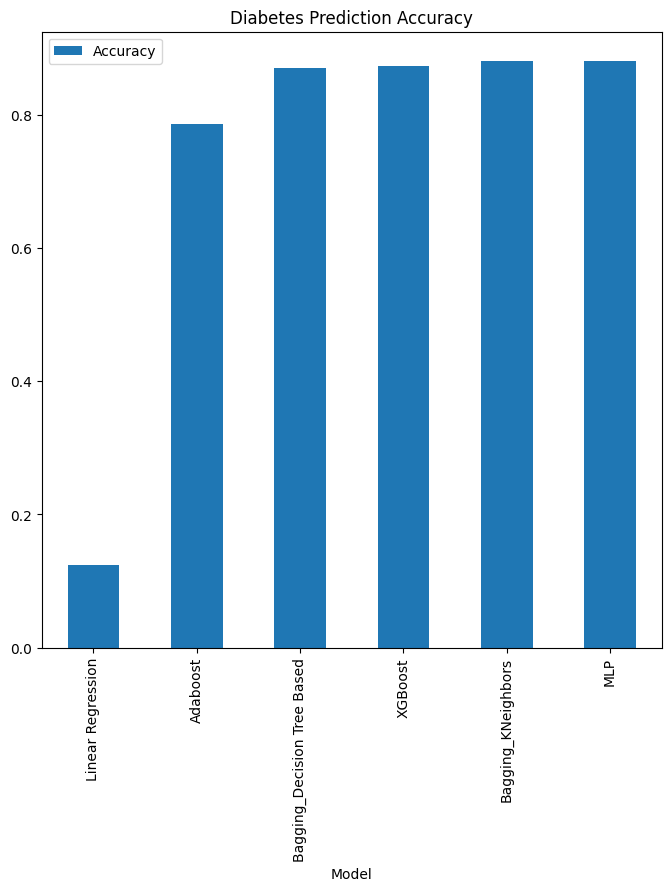

In [46]:
results_df.plot(x='Model', y='Accuracy', kind='bar', figsize=(8,8), title='Diabetes Prediction Accuracy', )